# Challenge: If a tree falls in the forest...
Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?
So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.
Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.
Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.
Submit a link to your models below.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from IPython.display import Image

# Packages for rendering our tree.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pydotplus
import graphviz

In [2]:
# Get some data to work with (added high crime indicator variable based on total crime proportion to population)
df_org = pd.read_csv('fbi_data_2013.csv')
df_org.columns = ['City','Population','Violent crime','Murder','Rape1','Rape2','Robbery','Agg_Assault','Prop_Crime','Burglary','Larceny','MV Theft','Arson3','Total Crime','Crime2Pop','High Crime']
df_org.fillna(0, inplace=True)

# Seen this data before, eliminate mostly empty data columns and stratify New York out of the equation
# Also, remove subtotal columns of Violent crime and property crime as they represent duplicates
data = df_org[['City','Population','Murder','Rape2','Robbery','Agg_Assault','Burglary','Larceny','MV Theft','High Crime']][df_org['City']!= "New York"]

# separate the crime statistics variables for evaluation and the population for prediction
crime_stats = pd.DataFrame()
crime_stats = data[['Population','Murder','Rape2','Robbery','Agg_Assault','Burglary','Larceny','MV Theft']]
result = pd.DataFrame()
result = data[['High Crime']]

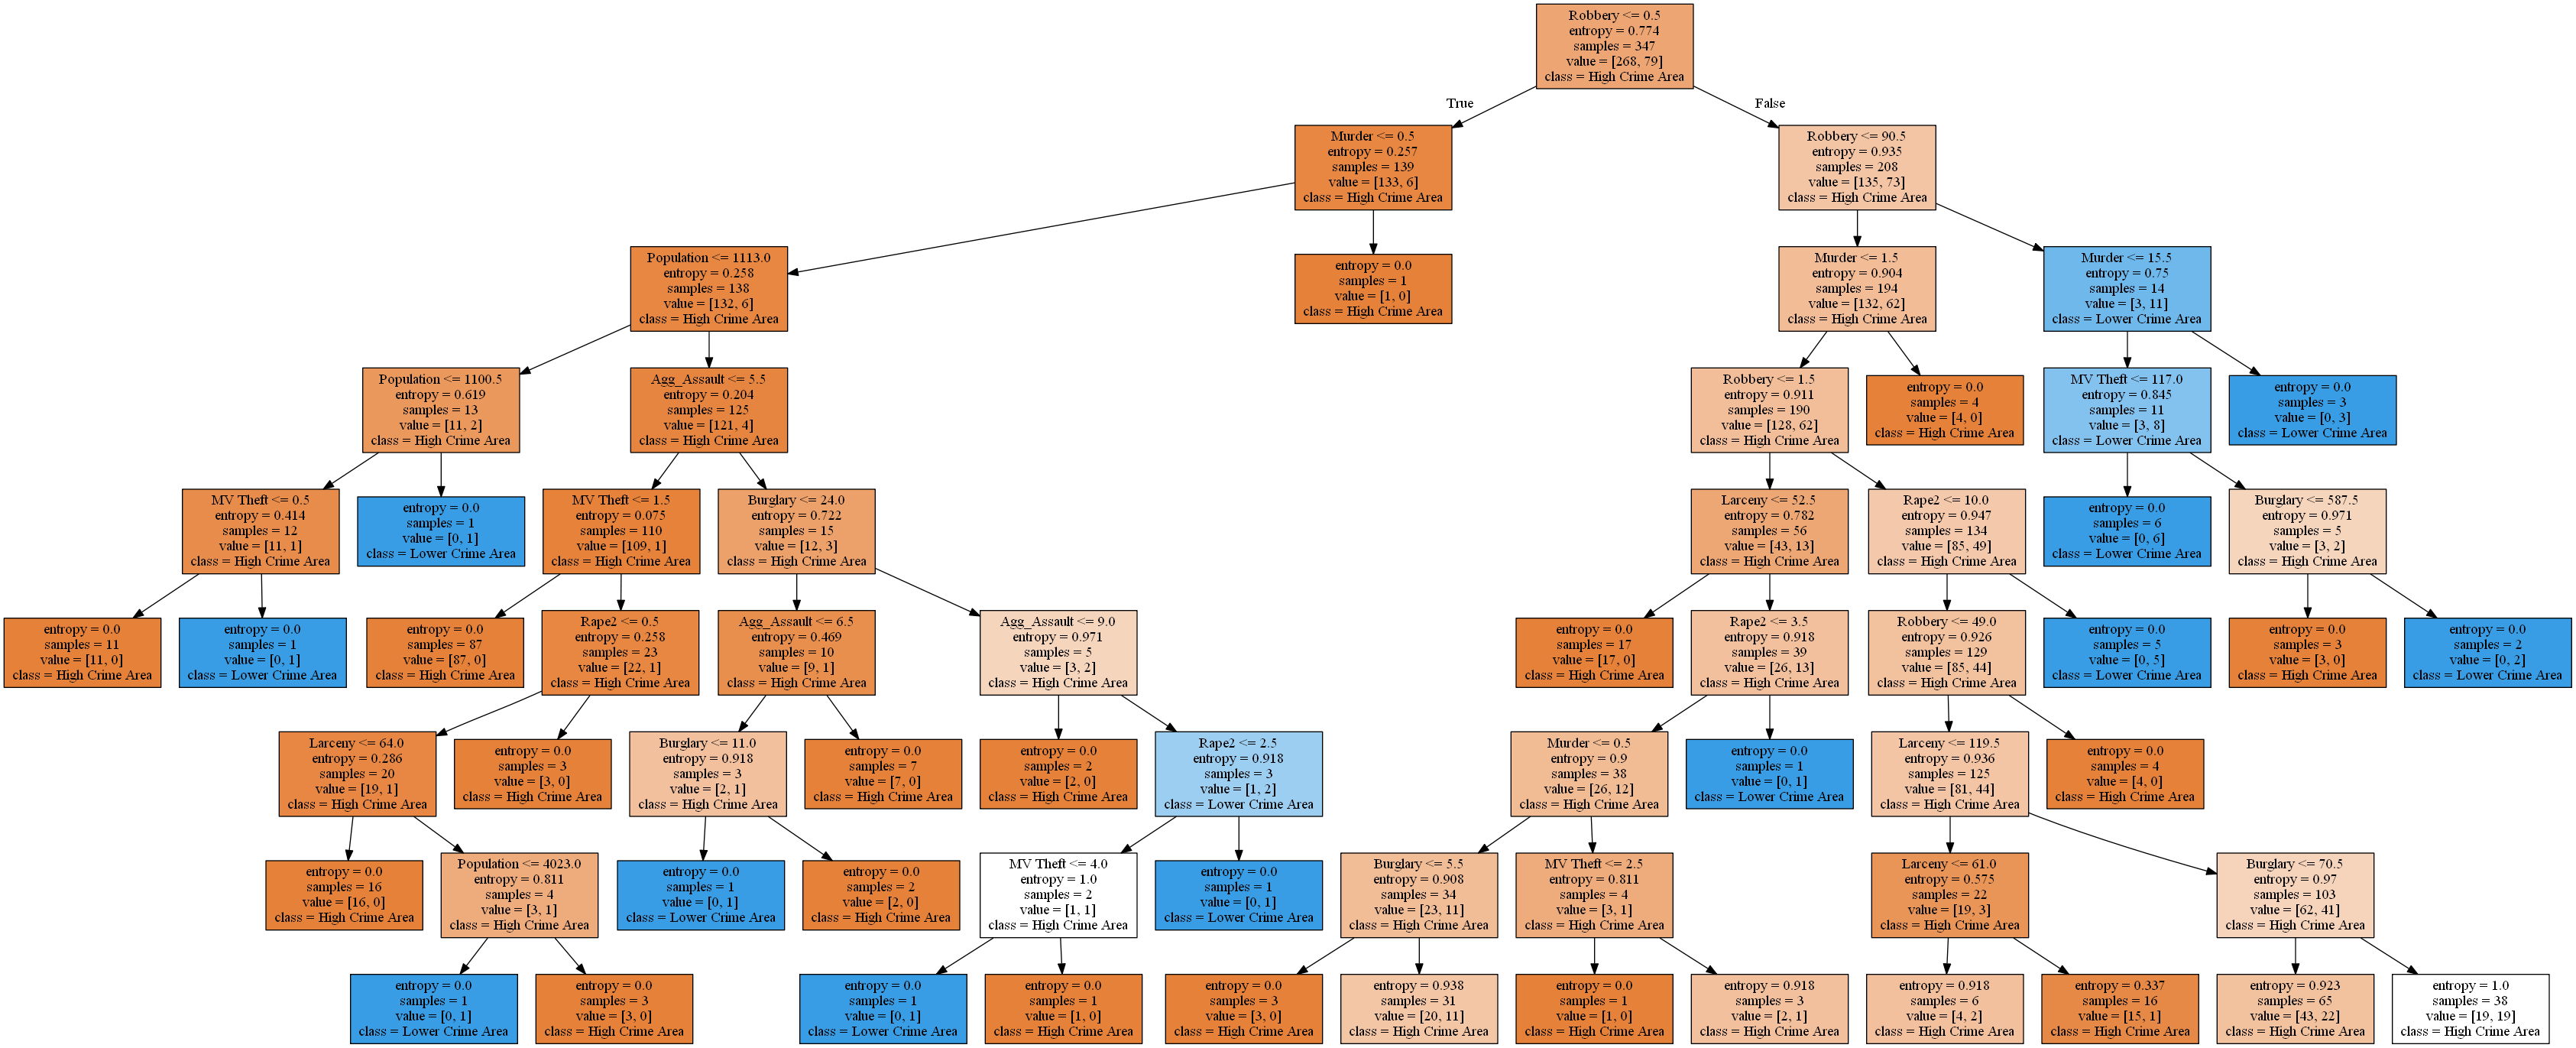

In [7]:
# Let's start at the beginning and see what a tree looks like
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=8,
)
decision_tree.fit(crime_stats, result)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=crime_stats.columns,
    class_names=['High Crime Area', 'Lower Crime Area'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#  This one gives the best result in terms of the most number of samples at leaf nodes
# with .85 or higher entropy AND runs faster than iterations with 2 or 3 features and less nodes

In [6]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = crime_stats
Y = result
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

array([0.87142857, 0.85714286, 0.91428571, 0.85507246, 0.80882353])

In [8]:
## run time isn't huge difference but my data file is pretty small.
# let's see if fewer variables get better result
X = data[['Murder','Rape2','Robbery','Agg_Assault','Burglary','Larceny','MV Theft']]
rfc = ensemble.RandomForestClassifier()
X = crime_stats
Y = result
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

array([0.88571429, 0.82857143, 0.85714286, 0.85507246, 0.88235294])

In [9]:
# results went down without population.  let's try just violent crime with population
X = data[['Murder','Rape2','Robbery','Agg_Assault','Population']]
rfc = ensemble.RandomForestClassifier()
X = crime_stats
Y = result
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

array([0.88571429, 0.88571429, 0.87142857, 0.84057971, 0.85294118])

In [10]:
# Nope, how about just property crimes
X = data[['Population','Burglary','Larceny','MV Theft']]
rfc = ensemble.RandomForestClassifier()
X = crime_stats
Y = result
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

array([0.88571429, 0.9       , 0.88571429, 0.84057971, 0.89705882])

In [11]:
#  This one might be a slight improvement
# Let's drop rape and murder only
X = data[['Population','Robbery','Agg_Assault','Burglary','Larceny','MV Theft']]
rfc = ensemble.RandomForestClassifier()
X = crime_stats
Y = result
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

array([0.88571429, 0.84285714, 0.9       , 0.79710145, 0.83823529])

In [12]:
# Nope, it seems the first one with all the statistics is really needed for best predictions.